In [1]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic.head() 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head() 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [3]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
 14  gender     1045 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 126.5+ KB


In [6]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass','age','sibsp','parch','fare','gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lgbm_clf = LGBMClassifier(n_estimators=400)
sgd_clf = SGDClassifier(random_state=13)
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=13)
rnd_clf = RandomForestClassifier(max_depth=4,  n_estimators=100, random_state=13)
NB_clf = MultinomialNB()

voting_clf = VotingClassifier(
    estimators=[('lgbm', lgbm_clf), ('sgb', sgd_clf), ('tree', tree_clf),
                   ('rnd', rnd_clf), ('NB', NB_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lgbm', LGBMClassifier(n_estimators=400)),
                             ('sgb', SGDClassifier(random_state=13)),
                             ('tree',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=13)),
                             ('rnd',
                              RandomForestClassifier(max_depth=4,
                                                     random_state=13)),
                             ('NB', MultinomialNB())])

In [12]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook


for clf in tqdm_notebook((lr_clf, lgbm_clf, sgd_clf, tree_clf, rnd_clf, NB_clf, voting_clf)):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

c:\users\oaqqa\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


LogisticRegression 0.7511961722488039
LGBMClassifier 0.7607655502392344
SGDClassifier 0.6889952153110048
DecisionTreeClassifier 0.7655502392344498
RandomForestClassifier 0.7799043062200957
MultinomialNB 0.6794258373205742
VotingClassifier 0.7703349282296651



In [23]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(6, )),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [26]:
model.compile(optimizer='adam',
            loss='mse',
            metrics=['accuracy'])

In [27]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 21,471
Trainable params: 21,471
Non-trainable params: 0
_________________________________________________________________


In [28]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=200, batch_size=10, verbose=1)
print('Fit time :', time.time() - start_time)

Epoch 1/200
84/84 [==============================] - 1s 7ms/step - loss: 0.3175 - accuracy: 0.6171 - val_loss: 0.2856 - val_accuracy: 0.6459
Epoch 2/200
84/84 [==============================] - 0s 3ms/step - loss: 0.2937 - accuracy: 0.6489 - val_loss: 0.2261 - val_accuracy: 0.6890
Epoch 3/200
84/84 [==============================] - 0s 3ms/step - loss: 0.2439 - accuracy: 0.6770 - val_loss: 0.2220 - val_accuracy: 0.7033
Epoch 4/200
84/84 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 0.6928 - val_loss: 0.2159 - val_accuracy: 0.7177
Epoch 5/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2222 - accuracy: 0.6725 - val_loss: 0.2118 - val_accuracy: 0.6890
Epoch 6/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2092 - accuracy: 0.6951 - val_loss: 0.2035 - val_accuracy: 0.6842
Epoch 7/200
84/84 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.7044 - val_loss: 0.1976 - val_accuracy: 0.6986
Epoch 8/200
8

84/84 [==============================] - 0s 3ms/step - loss: 0.1410 - accuracy: 0.8001 - val_loss: 0.1695 - val_accuracy: 0.7703
Epoch 59/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.8272 - val_loss: 0.1552 - val_accuracy: 0.7703
Epoch 60/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.8380 - val_loss: 0.1641 - val_accuracy: 0.7895
Epoch 61/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1370 - accuracy: 0.8141 - val_loss: 0.1780 - val_accuracy: 0.7416
Epoch 62/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.8229 - val_loss: 0.1669 - val_accuracy: 0.7560
Epoch 63/200
84/84 [==============================] - 0s 2ms/step - loss: 0.1458 - accuracy: 0.8013 - val_loss: 0.1782 - val_accuracy: 0.7560
Epoch 64/200
84/84 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.8186 - val_loss: 0.1631 - val_accuracy: 0.7703
Epoch 65/200
84/84 

Epoch 116/200
84/84 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.8642 - val_loss: 0.1737 - val_accuracy: 0.7799
Epoch 117/200
84/84 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.8611 - val_loss: 0.1816 - val_accuracy: 0.7847
Epoch 118/200
84/84 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.8407 - val_loss: 0.1890 - val_accuracy: 0.7416
Epoch 119/200
84/84 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.8555 - val_loss: 0.1880 - val_accuracy: 0.7464
Epoch 120/200
84/84 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.8607 - val_loss: 0.1859 - val_accuracy: 0.7608
Epoch 121/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1236 - accuracy: 0.8367 - val_loss: 0.1851 - val_accuracy: 0.7560
Epoch 122/200
84/84 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.8335 - val_loss: 0.1790 - val_accuracy: 0.7608

84/84 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.8685 - val_loss: 0.1918 - val_accuracy: 0.7560
Epoch 174/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.8786 - val_loss: 0.1984 - val_accuracy: 0.7416
Epoch 175/200
84/84 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.8603 - val_loss: 0.1962 - val_accuracy: 0.7560
Epoch 176/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.8493 - val_loss: 0.1973 - val_accuracy: 0.7560
Epoch 177/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.8753 - val_loss: 0.1986 - val_accuracy: 0.7464
Epoch 178/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 0.8575 - val_loss: 0.1976 - val_accuracy: 0.7608
Epoch 179/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.8489 - val_loss: 0.2121 - val_accuracy: 0.7273
Epoch 180/200

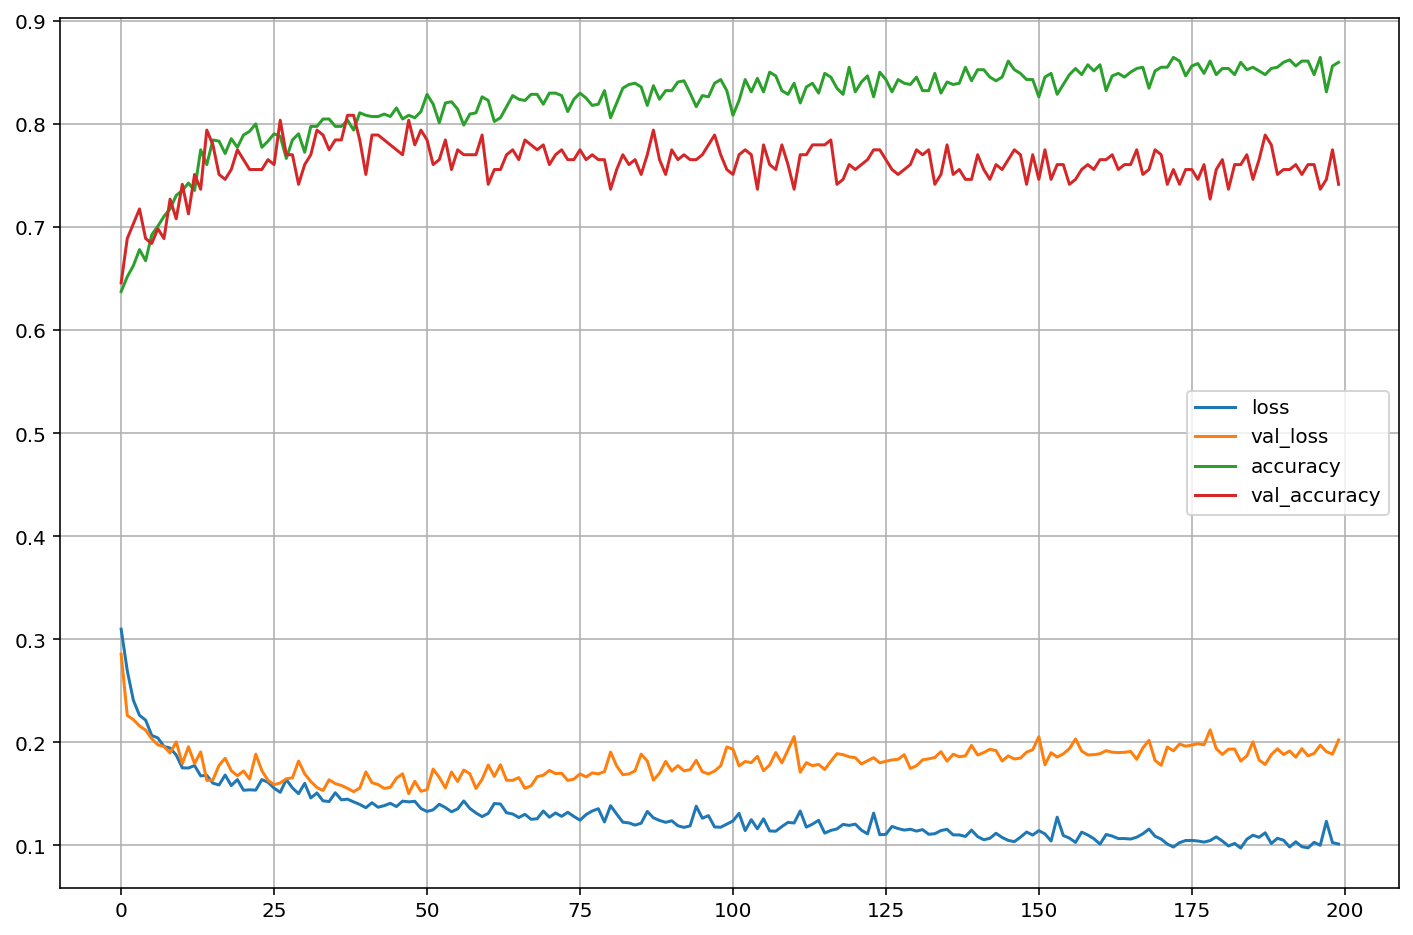

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show() 